# Machine Learning with sklearn
By Sovanna Ramirez
## Reading the Auto Data
Read Auto.csv into a data frame.

In [2]:
import pandas as pd

In [3]:
# use pandas to read data
url = 'https://raw.githubusercontent.com/sovanna4/Machine-Learning-Portfolio/main/Auto.csv'
df = pd.read_csv(url)

In [4]:
# output the first few rows
print("Auto Data: ")
print(df.head())

Auto Data: 
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [5]:
# output dimensions of the data
print("Auto Data Dimensions: ")
print(df.shape)

Auto Data Dimensions: 
(392, 9)


## Data Exploration with Code
Here we use **describe()** to provide some statistical details on some of the factors (mpg, weight, and year) in our data

In [6]:
# use describe() on the mpg, weight, and year columns
df[["mpg","weight","year"]].describe(include="all")

# mpg ranges from 9.0 to 46.6 and has an average of approximately 23.445918
# weight ranges from 1613.0 to 5140.0 and has an average of 2977.584184	
# year ranges from 70.0 to 82.0 and has an average of 76.010256

,mpg,weight,year
count,392.000000,392.000000,390.000000
mean,23.445918,2977.584184,76.010256
std,7.805007,849.402560,3.668093
min,9.000000,1613.000000,70.000000
25%,17.000000,2225.250000,73.000000
50%,22.750000,2803.500000,76.000000
75%,29.000000,3614.750000,79.000000
max,46.600000,5140.000000,82.000000


## Explore Data Types
Here we will check the data types of all columns and make changes to the columns in the data frame

In [7]:
# Check the data types of all the columns
print("Data Types for Each Column: ")
print(df.dtypes)

Data Types for Each Column: 
mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object


In [8]:
# Change the cylinders column to categorical using cat.codes
df.cylinders = df.cylinders.astype('category').cat.codes

# Change the origin column to categorical without cat.codes
df.origin = df.origin.astype('category')

# Check changes made to the columns using dtypes
print("Updated Data Types for Each Column: ")
print(df.dtypes)

Updated Data Types for Each Column: 
mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object


## Dealing with NAs

In [9]:
# Delete rows with NAs
df = df.dropna()

# output new dimensions
print("Updated Dimensions after Dropping NAs: ")
print(df.shape)

Updated Dimensions after Dropping NAs: 
(389, 9)


## Modify Columns

In [10]:
# make new column mpg_high with categorical data type: column == 1 if mpg > mpg_avg, else == 0
mpg_avg = df['mpg'].mean() # get mpg_avg
df['mpg_high'] = pd.cut(df['mpg'], bins=[0, mpg_avg, float('Inf')] , labels=[0,1])


In [11]:
# delete mpg and name columns
df = df.drop(columns=['mpg','name'])

# output first few rows of modified data
print(df.head())

   cylinders  displacement  horsepower  weight  acceleration  year origin  \
0          4         307.0         130    3504          12.0  70.0      1   
1          4         350.0         165    3693          11.5  70.0      1   
2          4         318.0         150    3436          11.0  70.0      1   
3          4         304.0         150    3433          12.0  70.0      1   
6          4         454.0         220    4354           9.0  70.0      1   

  mpg_high  
0        0  
1        0  
2        0  
3        0  
6        0  


## Data Exploration with Graphs
With the **catplot()** we can compare the vehicles with 1 (mpg >= mpg_avg) or 0 (mpg <= mpg_avg). We see that the count of vehicles across 1 and 0 are very close in number.

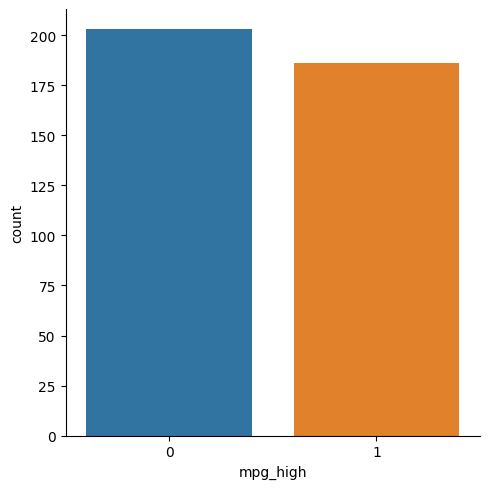

In [12]:
import seaborn as sb

# seaborn catplot on the mpg_high column
sb.catplot(x="mpg_high", kind="count", data = df)

With **relplot()**, or relation plot, we utilize horsepower and weight (two quantitative variables) to see how the variables relate to each other. Moreover, there is a correlation between the amount of horsepower and the weight of a vehicle. For vehicles with a smaller amount of horsepower and lighter weight, mpg tends to be higher than average mpg.

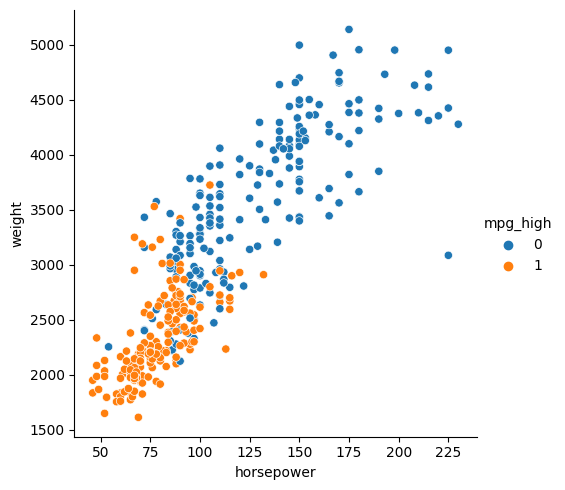

In [13]:
# relplot with horsepower on x-axis and weight on y-axis
sb.relplot(x="horsepower", y="weight", data=df, hue=df.mpg_high)

With **boxplot()**, we use mpg_high and weight as our variables. From this plot we can see that for vehicles 1 (with mpg >= avg_mpg) tend to weigh between 2000 and 2500 lbs. 

<Axes: xlabel='mpg_high', ylabel='weight'>

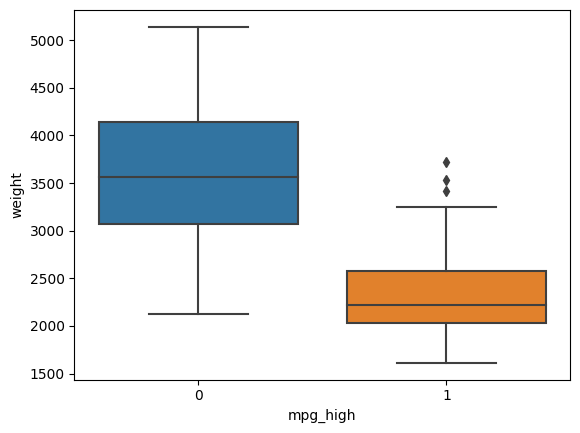

In [14]:
# boxplot() with mpg_high as x-axis and weight on y-axis
sb.boxplot(x="mpg_high", y="weight", data=df)

## Train/Test Split

In [15]:
from sklearn.model_selection import train_test_split

# 80/20 split using seed 1234 for same results
X = df.loc[:, ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = df.mpg_high

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (311, 7)
test size: (78, 7)


## Logistic Regression
Here he will train a logistic regression model using solver Ibfgs

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# train logistic regression model using sovler Ibfgs
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

# test and evaluate
lr_pred = lr.predict(X_test)

# print classification report metrics
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88        50
           1       0.73      0.96      0.83        28

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78



## Decision Tree

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        50
           1       0.86      0.89      0.88        28

    accuracy                           0.91        78
   macro avg       0.90      0.91      0.90        78
weighted avg       0.91      0.91      0.91        78



[Text(0.6433823529411765, 0.9444444444444444, 'x[0] <= 2.5\ngini = 0.5\nsamples = 311\nvalue = [153, 158]'),
 Text(0.4338235294117647, 0.8333333333333334, 'x[2] <= 101.0\ngini = 0.239\nsamples = 173\nvalue = [24, 149]'),
 Text(0.27941176470588236, 0.7222222222222222, 'x[5] <= 75.5\ngini = 0.179\nsamples = 161\nvalue = [16, 145]'),
 Text(0.14705882352941177, 0.6111111111111112, 'x[1] <= 119.5\ngini = 0.362\nsamples = 59\nvalue = [14, 45]'),
 Text(0.058823529411764705, 0.5, 'x[0] <= 0.5\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.029411764705882353, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08823529411764706, 0.3888888888888889, 'x[3] <= 2683.0\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(0.058823529411764705, 0.2777777777777778, 'x[3] <= 2377.0\ngini = 0.045\nsamples = 43\nvalue = [1, 42]'),
 Text(0.029411764705882353, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.08823529411764706, 0.16666666666666666, 'x[3

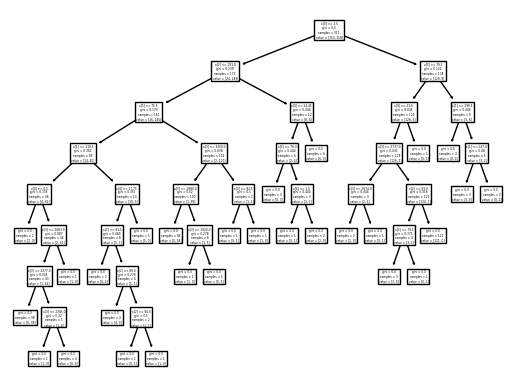

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# train decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# test and evaluate
dt_pred = dt.predict(X_test)

# print classification report metrics
print(classification_report(y_test, dt_pred))

# plot the tree
tree.plot_tree(dt)

## Neural Network

In [22]:
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

# scale the data
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train a neural network
nn = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2), max_iter=500, random_state=1234)
nn.fit(X_train_scaled, y_train)

# test and evaluate
nn_pred = nn.predict(X_test_scaled)

# print classification report metrics
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        50
           1       0.76      0.89      0.82        28

    accuracy                           0.86        78
   macro avg       0.85      0.87      0.85        78
weighted avg       0.87      0.86      0.86        78



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [23]:
# train a second neural network with different settings
nn = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(2,), max_iter=500, random_state=1234)
nn.fit(X_train_scaled, y_train)

# test and evaluate
nn_pred = nn.predict(X_test_scaled)

# print classification report metrics
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90        50
           1       0.77      0.96      0.86        28

    accuracy                           0.88        78
   macro avg       0.87      0.90      0.88        78
weighted avg       0.90      0.88      0.89        78



### Neural Network Comparison
We see that our second neural network with 2 nodes, got a higher accuracy of 88% compared to the first neural network accuracy of 86%. Moreover, our second model had only one hidden layer. The increased simplicity within that model could explain why it was able to better capture the complexity of our data. With hidden_layer_sizes=(5,2) we had a more complex model. And with our data, we can see that we might not have needed a more complex model to acheive better accuracy.

## Analysis

After building, training, and testing each model (logistic regression, decision tree, and neural networks), decision tree performed the best. As seen in our accuracy results for each algorithm, decision tree had 91% accuracy, neural network came in second with 88%, and finally logistic regression came in last with 86%. In comparison with the other algorithms, the decision tree algorithm was able to outperform the others because of its ability to represent non-linear relationships within the data.

I personally enjoyed using sklearn significantly over R. I think the combination of the environment and using Google colab when learning sklearn helped in making my experience more enjoyable. For both sklearn and R, I do appreciate the physical breakdown of the code into manageable segments and seeing how those segments run on their own. Overall, sklearn has been significantly more simple than my experience with R.